# 5. (Extra) Modelagem de Regressão - Tech Challenge Fase 3

Este notebook é um **bônus/extra** para o projeto.
Além de classificar SE o voo vai atrasar, tentaremos prever **O TEMPO EXATO** do atraso (em minutos).

**Objetivo:** Prever a variável `ARRIVAL_DELAY` (numérica contínua).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Carga e Preparação para Regressão

In [2]:
try:
    df = pd.read_csv('flights_ml_ready.csv')
    print(f"Dataset carregado! Shape: {df.shape}")
except FileNotFoundError:
    print("ERRO: Arquivo 'flights_ml_ready.csv' não encontrado.")

# Separando X e y para Regressão
# Alvo agora é 'ARRIVAL_DELAY'
# Removemos 'IS_DELAYED' (resposta da classificação) e o próprio alvo do X
X = df.drop(['IS_DELAYED', 'ARRIVAL_DELAY'], axis=1)
y = df['ARRIVAL_DELAY']

# Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Dataset carregado! Shape: (100000, 12)
Treino: (70000, 10), Teste: (30000, 10)


## 2. Treinamento (Linear vs Random Forest)

In [3]:
# Modelo 1: Regressão Linear (Baseline)
print("Treinando Regressão Linear...")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Concluído!")

Treinando Regressão Linear...
Concluído!


In [4]:
# Modelo 2: Random Forest Regressor (Mais pesado, vamos limitar profundidade)
print("Treinando Random Forest Regressor (pode demorar)...")
rf_reg = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("Concluído!")

Treinando Random Forest Regressor (pode demorar)...
Concluído!


## 3. Avaliação de Performance
Métricas:
- **RMSE (Root Mean Squared Error):** Erro médio quadrático (na mesma unidade do target, minutos).
- **MAE (Mean Absolute Error):** Erro absoluto médio (minutos).
- **R² (R-Quadrado):** Quanto da variância o modelo explica.

In [5]:
def avaliar_regressao(nome, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"=== {nome} ===")
    print(f"RMSE: {rmse:.2f} minutos")
    print(f"MAE:  {mae:.2f} minutos")
    print(f"R²:   {r2:.4f}")
    print("-" * 30)

avaliar_regressao("Regressão Linear", y_test, y_pred_lr)
avaliar_regressao("Random Forest", y_test, y_pred_rf)

=== Regressão Linear ===
RMSE: 12.58 minutos
MAE:  8.82 minutos
R²:   0.8913
------------------------------
=== Random Forest ===
RMSE: 13.05 minutos
MAE:  8.89 minutos
R²:   0.8830
------------------------------


### Visualização: Previsto vs Real
Vamos plotar uma amostra para ver se os pontos ficam perto da linha diagonal (previsão perfeita).

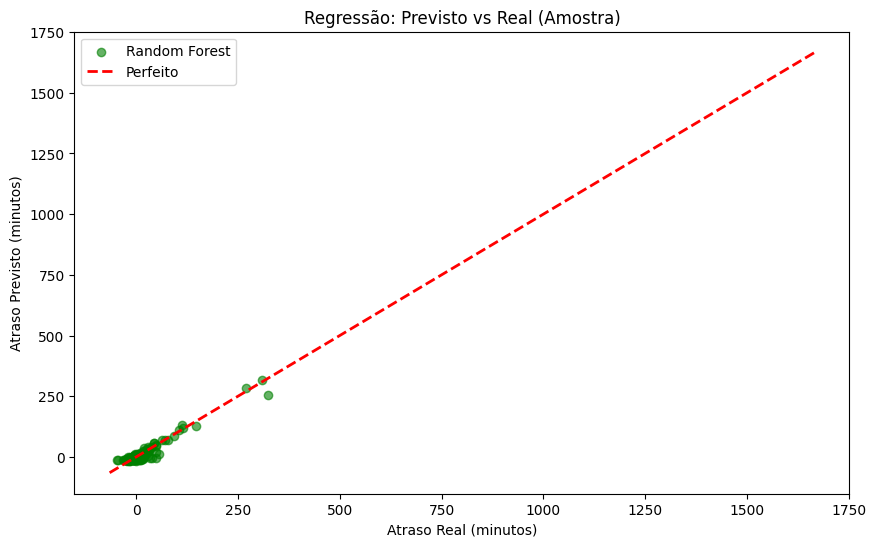

In [6]:
plt.figure(figsize=(10, 6))
# Amostra de 200 pontos para o gráfico ficar legível
plt.scatter(y_test[:200], y_pred_rf[:200], alpha=0.6, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfeito')
plt.title('Regressão: Previsto vs Real (Amostra)')
plt.xlabel('Atraso Real (minutos)')
plt.ylabel('Atraso Previsto (minutos)')
plt.legend()
plt.show()